In [1]:
import ast
import sys
import os

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
ROOT_PATH = '/'.join(os.getcwd().split('/')[:-3])
DATA_PATH = f'{ROOT_PATH}/dataset/BookCrossing'
DATA_PATH

'/home/jovyan/NVIDIA_CUDA-11.1_Samples/TIL/AI_study/dataset/BookCrossing'

In [3]:
df = pd.read_csv(f'{DATA_PATH}/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   871393 non-null  object 
 1   User-ID              871393 non-null  object 
 2   Book-ID              871393 non-null  object 
 3   Book-Rating          871393 non-null  int64  
 4   Age                  871393 non-null  float64
 5   Location             871393 non-null  object 
 6   Book-Title           871393 non-null  object 
 7   Book-Author          871393 non-null  object 
 8   Year-Of-Publication  871393 non-null  float64
 9   Publisher            871393 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 66.5+ MB


In [4]:
print(f'# of books : {df["Book-ID"].nunique()}')
print(f'# of users : {df["User-ID"].nunique()}')

# of books : 243441
# of users : 83256


/tmp/ipykernel_133970/3349487719.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde = False)


<AxesSubplot: xlabel='Age'>

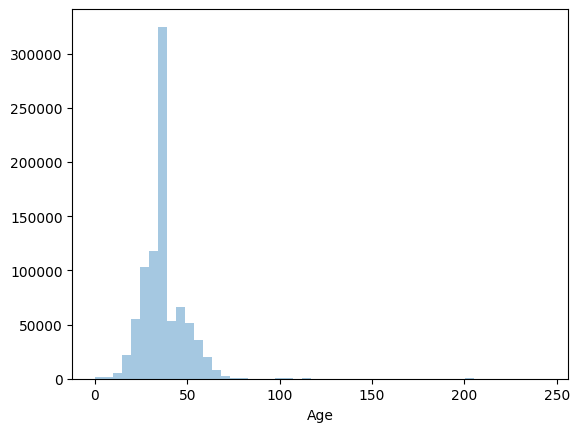

In [5]:
sns.distplot(df['Age'], kde = False)

# of outliers : 2573


<AxesSubplot: xlabel='Book-Rating', ylabel='count'>

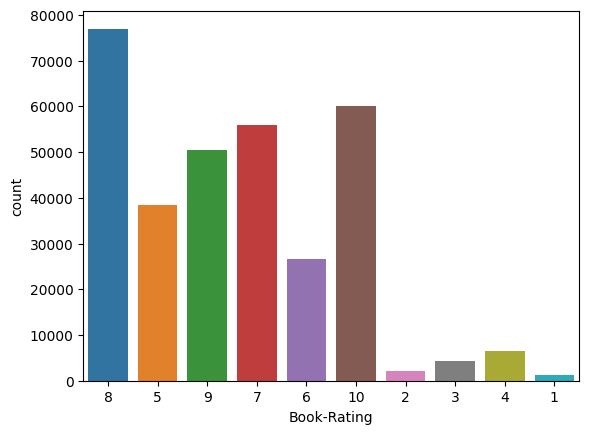

In [6]:
print(f'# of outliers : {len(df[df["Age"] > 100])}')
df['Book-Rating'] = df['Book-Rating'].replace(0, None)
sns.countplot(x = 'Book-Rating', data = df)

Average book Rating : 7.62


/tmp/ipykernel_133970/243711069.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(year, kde = False, hist_kws = {'range' : [1945, 2020]})


<AxesSubplot: xlabel='Year-Of-Publication'>

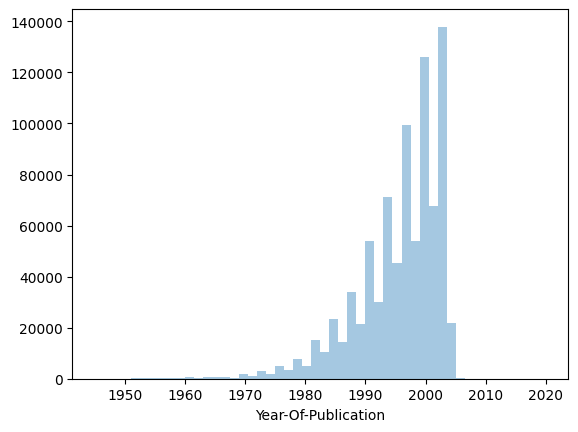

In [7]:
print(f'Average book Rating : {round(df["Book-Rating"].mean(), 2)}')
year = pd.to_numeric(df['Year-Of-Publication'], 'coerce').fillna(2099, downcast = 'infer')
sns.distplot(year, kde = False, hist_kws = {'range' : [1945, 2020]})

In [8]:
country = df['Location'].apply(lambda row: str(row).split(',')[-1])
df.groupby(country)['Book-Rating'].count().sort_values(ascending=False).head(10)

Location
 usa               219650
 canada             29932
 united kingdom     11980
 germany            10334
                     9019
 n/a                 6954
 spain               6045
 australia           5847
 france              3892
 portugal            2918
Name: Book-Rating, dtype: int64

In [9]:
df['Year-Of-Publication'] = pd.to_numeric(df['Year-Of-Publication'], 'coerce').fillna(2099, downcast = 'infer')
df['Book-Rating'] = df['Book-Rating'].replace(0, None)
df['Age']         = np.where(df['Age'] > 90, None, df['Age'])
df[['Book-Author', 'Publisher']] = df[['Book-Author', 'Publisher']].fillna('Unknown')

In [11]:
median    = df['Age'].median()
std       = df['Age'].std()
is_null   = df['Age'].isnull().sum()
rand_age  = np.random.randint(median - std, median + std, size = is_null)
age_slice = df['Age'].copy()

age_slice[pd.isnull(age_slice)] = rand_age
df['Age'] = age_slice
df['Age'] = df['Age'].astype(int)
df['Age'].isnull().sum()

0